In [1]:
# Get all files under the directory enron/maildir
import os
filenames = []
alldirs = []
for root, dirs, files in os.walk('midterm/data/enron/maildir'):
    for file in files:
        if not file.startswith('.'):
            filename = root + '/' + file
            filenames.append(filename)
print('Number of files explored :', len(filenames))

Number of files explored : 517401


In [2]:
# Parse the files and add the emails to a list for analysis
from email.parser import Parser
emails = []
for filename in filenames:
    with open(filename, encoding='utf-8', errors="ignore") as file:
        lines = file.read()
        email = Parser().parsestr(lines)  
        emails.append(email)
print('Number of emails to be analyzed :', len(emails))

Number of emails to be analyzed : 517401


# 1. WHAT DID THE EMAILS TALK ABOUT

##  What did the emails say according to their subjects?

In [3]:
subjects = [email['Subject'] for email in emails]
subjects_str = ' '.join(subjects)

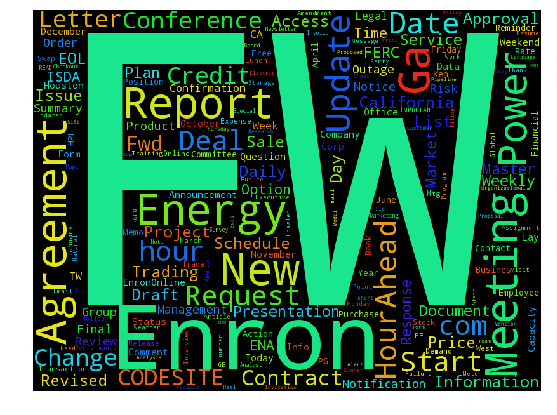

In [4]:
import matplotlib.pyplot as plt
import wordcloud
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
wc = wordcloud.WordCloud(width=800, height=600, max_words=200, stopwords=ENGLISH_STOP_WORDS).generate(subjects_str)
plt.figure(figsize=(12,7))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [9]:
# Now, do not consider those subjects which contain 'fw'
subjects_ = [email['Subject'] for email in emails if 'fw' not in email['Subject'].lower()]
subjects_str_ = ' '.join(subjects_)

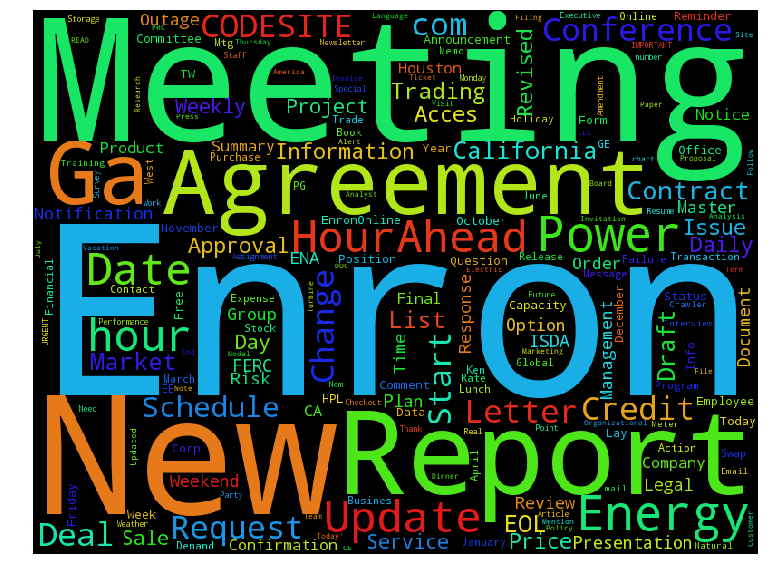

In [10]:
import matplotlib.pyplot as plt
import wordcloud
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
wc = wordcloud.WordCloud(width=800, height=600, max_words=200, stopwords=ENGLISH_STOP_WORDS).generate(subjects_str_)
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

## What did the contents of the emails say?

In [11]:
contents = [email.get_payload() for email in emails]
contents_str = ' '.join(contents)

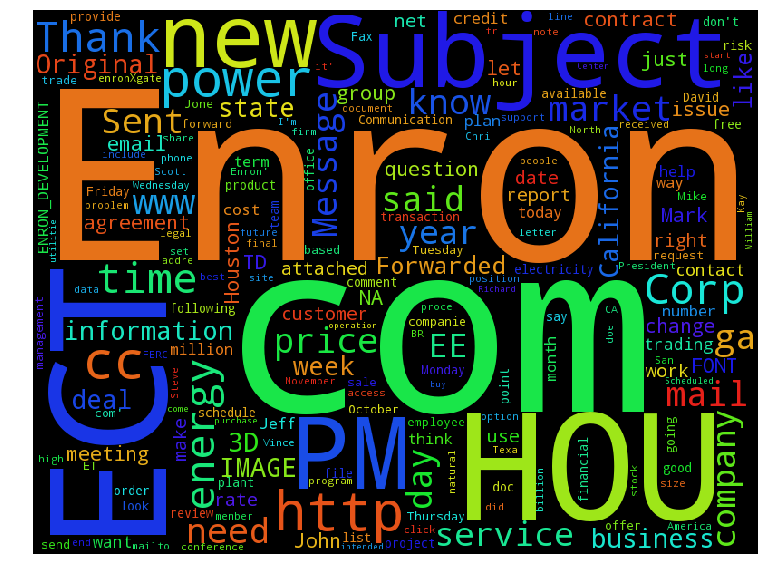

In [12]:
import matplotlib.pyplot as plt
import wordcloud
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
wc = wordcloud.WordCloud(width=800, 
                         height=600, 
                         max_words=200,
                         stopwords=ENGLISH_STOP_WORDS).generate(contents_str)
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

# 2. WHEN DID THE PEOPLE SEND EMAILS

In [13]:
from datetime import datetime
dates = [datetime.strptime(email['Date'][:-6],'%a, %d %b %Y %X %z') for email in emails]

## The years

In [14]:
yearcount = {}
for date in dates:
    if date.year in yearcount:
        yearcount[date.year] += 1
    else:
        yearcount[date.year] = 1  
print("Year & Number of emails sent :\n",yearcount)

Year & Number of emails sent :
 {1986: 2, 1: 213, 2: 58, 2043: 1, 2020: 2, 2024: 1, 2044: 3, 1997: 437, 1998: 177, 1999: 11144, 2000: 196101, 2001: 272819, 2002: 35847, 2004: 70, 2005: 1, 2007: 1, 1979: 522, 2012: 2}


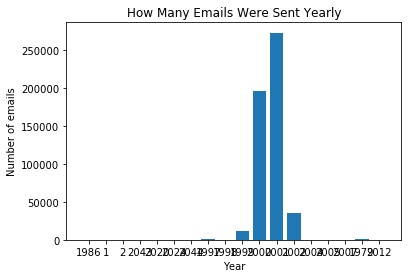

In [15]:
import matplotlib.pyplot as plt
plt.bar(range(len(yearcount)), yearcount.values())
plt.xticks(range(len(yearcount)), yearcount.keys())
plt.ylabel('Number of emails')
plt.xlabel('Year')
plt.title('How Many Emails Were Sent Yearly')
plt.figure(figsize=(150,60))
plt.show()

## The weekdays

In [16]:
weekcount = {}
for date in dates:
    if date.weekday() in weekcount:
        weekcount[date.weekday()] += 1
    else:
        weekcount[date.weekday()] = 1 
print('Weekday & Number of emails sent :\n',weekcount)

Weekday & Number of emails sent :
 {0: 101173, 1: 106432, 2: 106503, 3: 96098, 4: 86410, 5: 7031, 6: 13754}


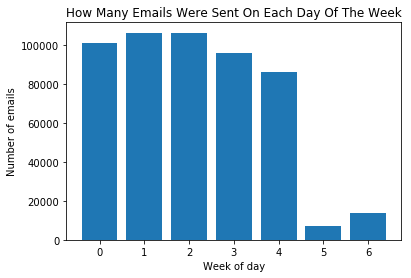

In [17]:
import matplotlib.pyplot as plt
plt.bar(range(len(weekcount)), weekcount.values())
plt.xticks(range(len(weekcount)), weekcount.keys())
plt.ylabel('Number of emails')
plt.xlabel('Week of day')
plt.title('How Many Emails Were Sent On Each Day Of The Week')
plt.show()

## The months

In [18]:
monthcount = {}
for date in dates:
    if date.month in monthcount:
        monthcount[date.month] += 1
    else:
        monthcount[date.month] = 1 
print('Weekday & Number of emails sent :\n',monthcount)

Weekday & Number of emails sent :
 {1: 51788, 2: 38583, 3: 40746, 4: 45912, 5: 47547, 6: 33813, 7: 25033, 8: 29091, 9: 32121, 10: 63388, 11: 62523, 12: 46856}


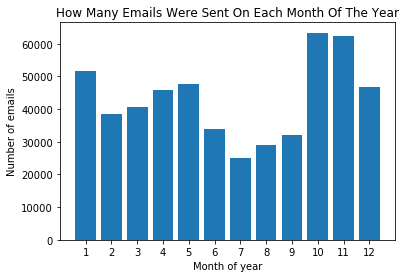

In [19]:
import matplotlib.pyplot as plt
plt.bar(range(len(monthcount)), monthcount.values())
plt.xticks(range(len(monthcount)), monthcount.keys())
plt.ylabel('Number of emails')
plt.xlabel('Month of year')
plt.title('How Many Emails Were Sent On Each Month Of The Year')
plt.show()

# 3. WHO COMMUNICATED VIA EMAILS THE MOST

## Who had the most emails?

In [20]:
people = [email['X-Origin'] for email in emails]

In [21]:
emailorigins = {}
for p in people:
    if p in emailorigins:
        emailorigins[p] += 1
    else:
        emailorigins[p] = 1
import operator
sorted_emailorigins = sorted(emailorigins.items(), key=operator.itemgetter(1), reverse = True)
mostorigin = sorted_emailorigins[0][0]
print('People & How many emails did they have :\n', sorted_emailorigins[:10], '\n\n So ', mostorigin, ' had the most emails.' )

People & How many emails did they have :
 [('Kaminski-V', 26995), ('DASOVICH-J', 26323), ('KEAN-S', 23621), ('MANN-K', 22414), ('JONES-T', 18598), ('SHACKLETON-S', 16158), ('Taylor-M', 13875), ('Farmer-D', 11677), ('SYMES-K', 10827), ('Germany-C', 9619)] 

 So  Kaminski-V  had the most emails.


## Which two accounts communicated the most?

In [22]:
# Get rid of the cases where people sent themselves emails or the receiver/sender was none
from_tos = [(email['From'],email['To']) for email in emails 
            if (email['From'] is not None) and (email['To'] is not None) and (email['From'] != email['To'])]
connections = {}
for from_to in from_tos:
    if from_to in connections:
        connections[from_to] += 1
    else:
        connections[from_to] = 1


In [23]:
import operator
sorted_emailorigins = sorted(connections.items(), key=operator.itemgetter(1), reverse = True)
print('Here are the sender/receiver pairs that had the top connections:')
sorted_emailorigins[:10]

Here are the sender/receiver pairs that had the top connections:


[(('vince.kaminski@enron.com', 'vkaminski@aol.com'), 4308),
 (('enron.announcements@enron.com', 'all.worldwide@enron.com'), 2206),
 (('enron.announcements@enron.com', 'all.houston@enron.com'), 1701),
 (('kay.mann@enron.com', 'suzanne.adams@enron.com'), 1528),
 (('vince.kaminski@enron.com', 'shirley.crenshaw@enron.com'), 1190),
 (('steven.kean@enron.com', 'maureen.mcvicker@enron.com'), 1014),
 (('kay.mann@enron.com', 'nmann@erac.com'), 980),
 (('kate.symes@enron.com', 'evelyn.metoyer@enron.com'), 915),
 (('kate.symes@enron.com', 'kerri.thompson@enron.com'), 859),
 (('evelyn.metoyer@enron.com', 'kate.symes@enron.com'), 791)]